## Quadratic Regression - Linear Regression vs XGBoost

Model is trained with XGBoost installed in notebook instance

In the later examples, train using SageMaker's XGBoost algorithm.

Training on SageMaker will take several minutes (even for simple dataset)

If algorithm is supported on Python, we will try them locally on notebook instance

This allows us to quickly learn an algorithm, understand tuning options and then finally train on SageMaker Cloud

In this excercise, let's compare XGBoost and Linear Regression for Quadratic regression dataset

In [1]:
# Install XGBoost in notebook

!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.2 MB/s eta 0:00:00:00:0100:01


In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('quadratic_all.csv')

In [4]:
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


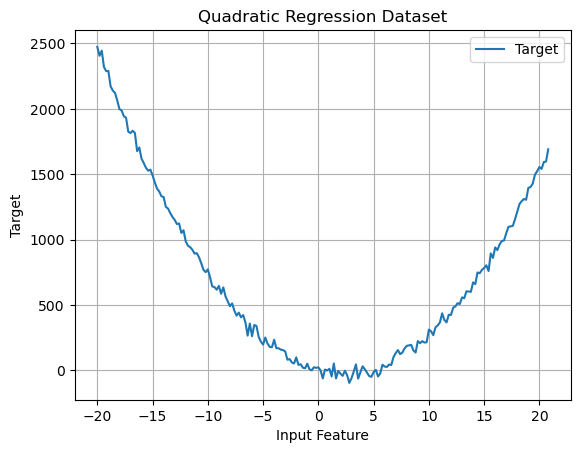

In [5]:
plt.plot(df.x, df.y, label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Quadratic Regression Dataset')
plt.show()

In [6]:
train_file = 'quadratic_train.csv'
validation_file ='quadratic_validation.csv'

df_train = pd.read_csv(train_file, names=['y','x'])
df_validation = pd.read_csv(validation_file, names=['y','x'])

In [7]:
df_train.head()

,y,x
0,343.968005,10.8
1,1585.894405,-15.8
2,1497.303317,19.6
3,769.909912,-10.4
4,1173.230755,-13.2


In [8]:
df_validation.head()

,y,x
0,1824.856344,-17.2
1,16.997917,-1.2
2,1832.141730,-16.8
3,1395.206684,19.0
4,145.840543,-3.0


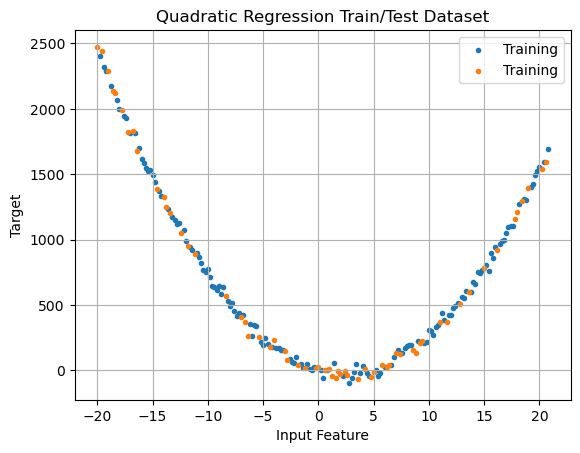

In [9]:
plt.scatter(df_train.x, df_train.y, label='Training', marker='.')
plt.scatter(df_validation.x, df_validation.y, label='Training', marker='.')
plt.grid()
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Quadratic Regression Train/Test Dataset')
plt.show()

In [10]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:, 0].to_numpy()

X_validation = df_validation.iloc[:, 1:]
y_validation = df_validation.iloc[:, 0].to_numpy()

In [11]:
# Create an instance of XGBoost Regressor
regressor = xgb.XGBRegressor()

In [12]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:453.25811	validation_1-rmse:560.69083
[1]	validation_0-rmse:332.17628	validation_1-rmse:415.62534
[2]	validation_0-rmse:244.45055	validation_1-rmse:312.10338
[3]	validation_0-rmse:180.85819	validation_1-rmse:236.45161
[4]	validation_0-rmse:135.28871	validation_1-rmse:183.16672
[5]	validation_0-rmse:101.61011	validation_1-rmse:142.33860
[6]	validation_0-rmse:77.26878	validation_1-rmse:113.65266
[7]	validation_0-rmse:59.86232	validation_1-rmse:93.77943
[8]	validation_0-rmse:47.35707	validation_1-rmse:80.28422
[9]	validation_0-rmse:38.22185	validation_1-rmse:71.00146
[10]	validation_0-rmse:31.95053	validation_1-rmse:64.92554
[11]	validation_0-rmse:27.07269	validation_1-rmse:61.27254
[12]	validation_0-rmse:23.81246	validation_1-rmse:58.39258
[13]	validation_0-rmse:21.29666	validation_1-rmse:56.78740
[14]	validation_0-rmse:19.66142	validation_1-rmse:55.16771
[15]	validation_0-rmse:18.42793	validation_1-rmse:54.10944
[16]	validation_0-rmse:17.21250	validation_1-rmse:53.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
eval_result = regressor.evals_result()

In [15]:
eval_result

{'validation_0': OrderedDict([('rmse',
               [453.2581072547314,
                332.17628011464024,
                244.45055316891342,
                180.85819218932843,
                135.288711477416,
                101.61011001733857,
                77.26877917632179,
                59.862316582814444,
                47.357069736633534,
                38.22185083611421,
                31.95053015184096,
                27.07269040980899,
                23.812459019774348,
                21.296661868539566,
                19.661416529403606,
                18.427933346245766,
                17.212496863909863,
                16.25703395291429,
                15.543209938576371,
                14.98583916132777,
                14.290972060577584,
                13.446855609575644,
                13.100629183431648,
                12.463617717260394,
                11.893428723803131,
                11.48149197031493,
                11.08701148246967,


In [16]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [17]:
training_rounds

range(0, 100)

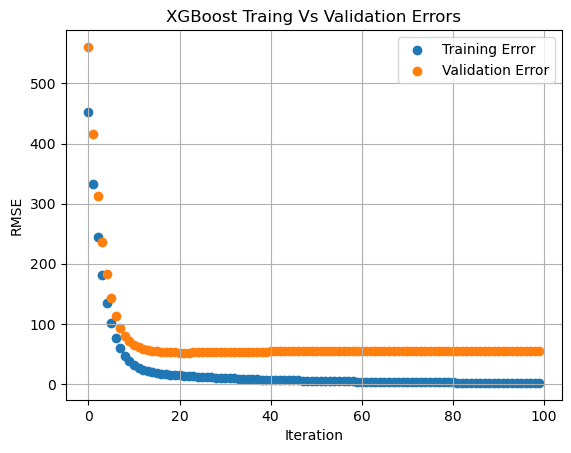

In [18]:
plt.scatter(training_rounds, eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(training_rounds, eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('XGBoost Traing Vs Validation Errors')
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

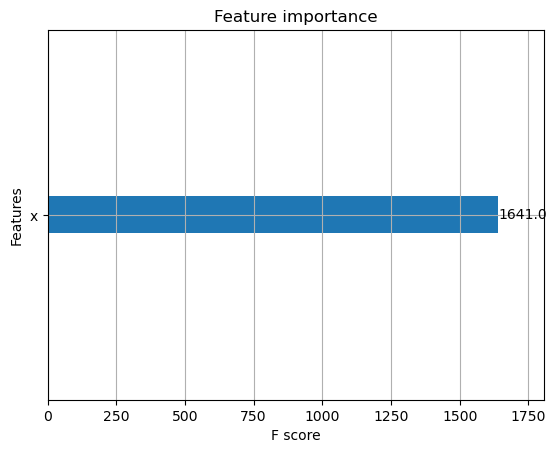

In [19]:
xgb.plot_importance(regressor)

### Comparing Actual and Validation datasets

In [20]:
result = regressor.predict(X_validation)

In [21]:
result[:5]

array([1931.901   ,   23.967096, 1815.8114  , 1306.171   ,  155.5736  ],
      dtype=float32)

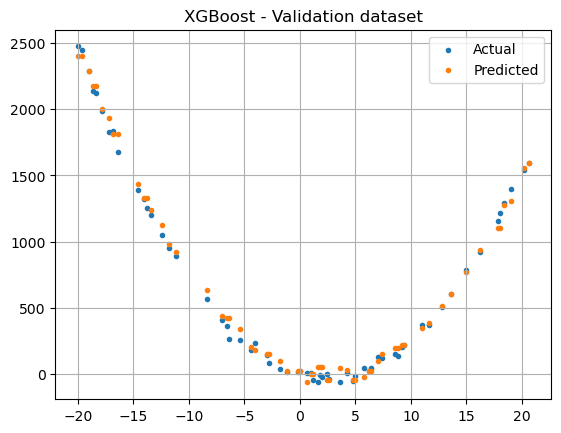

In [22]:
plt.title('XGBoost - Validation dataset')
plt.scatter(df_validation.x, df_validation.y, label='Actual', marker='.')
plt.scatter(df_validation.x, result, label='Predicted', marker='.')
plt.grid()
plt.legend()
plt.show()

In [23]:
# RMSE Metrics

print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y, result)

print(' mean squared error: {0:.2f}'.format(mse))
print(' root mean squared error: {0:.2f}'.format(mse**.5))

XGBoost Algorithm Metrics
 mean squared error: 3044.24
 root mean squared error: 55.17


### Residual

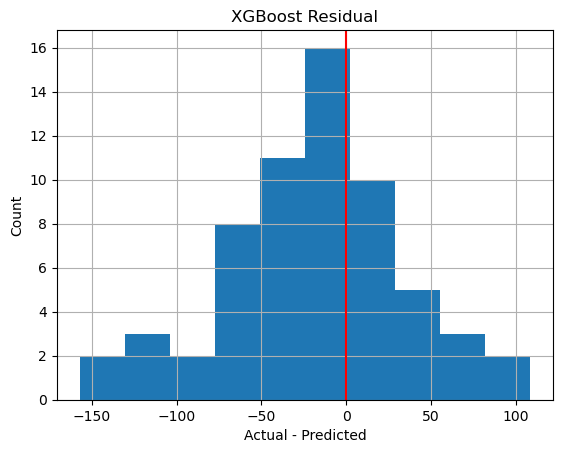

In [24]:
# Over prediction and under prediction needs to be balanced
# Training data Residuals

residuals = df_validation.y - result
plt.hist(residuals)
plt.grid()
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r')
plt.show()

In [25]:
value_counts = (residuals>0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 23
 Over Estimation: 39


### Plot for entire dataset

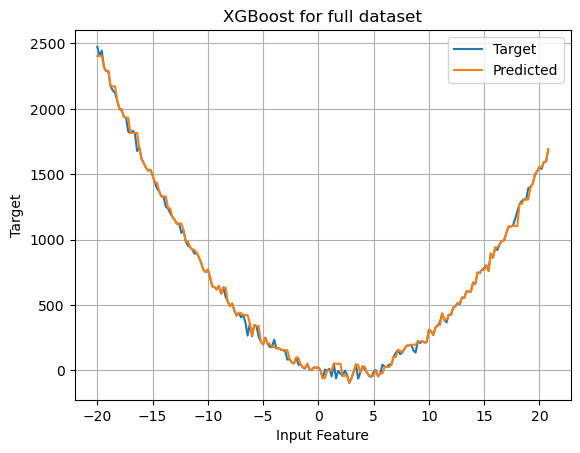

In [26]:
plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, regressor.predict(df[['x']]), label='Predicted')
plt.grid()
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost for full dataset')
plt.show()

## Linear Regression algorithm

In [27]:
lin_regressor = LinearRegression()

In [28]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

Compare Weights assigned by Linear Regression

original function 5x^2-23x + 47 + somenoise

In [29]:
lin_regressor.coef_

array([-15.07800272])

In [30]:
lin_regressor.intercept_

709.8622001903116

Linear Regression Function: -15.08*x + 709.86
    
Linear Regression Coefficients and Intercepts are not close to actual

In [31]:
result = lin_regressor.predict(X_validation[['x']])

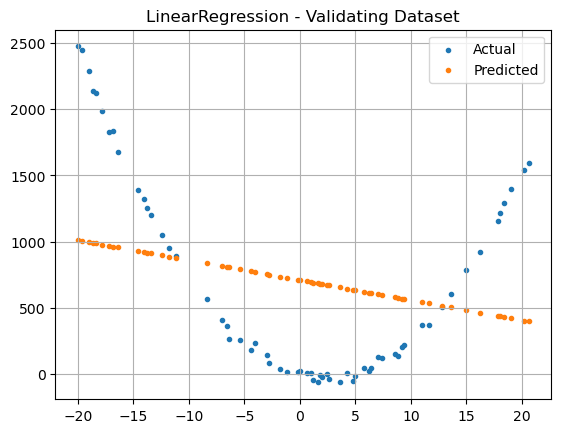

In [32]:
plt.title('LinearRegression - Validating Dataset')
plt.scatter(df_validation.x, df_validation.y, label='Actual',marker='.')
plt.scatter(df_validation.x, result, label='Predicted', marker='.')
plt.grid()
plt.legend()
plt.show()

In [33]:
# RMSE Metrics
print('Linear Regression Metriscs')


mse = mean_squared_error(df_validation.y, result)
print(' mean squared error: {0:.2f}'.format(mse))
print(' root mean squared error: {0:.2f}'.format(mse**.5))

Linear Regression Metriscs
 mean squared error: 488269.59
 root mean squared error: 698.76


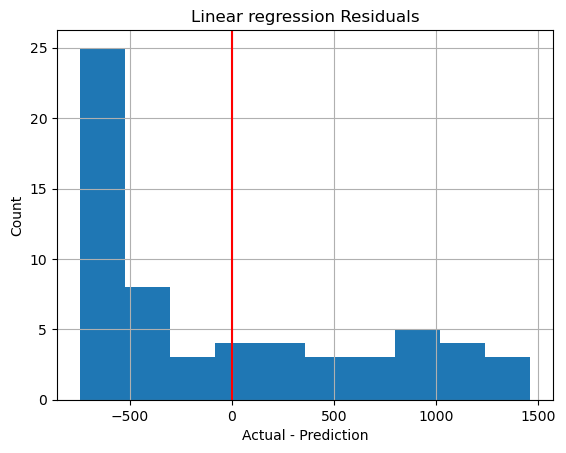

In [34]:
# Residual
# Over prediction and UnderP Prediction needs to be balanced

residuals = df_validation.y - result
plt.hist(residuals)
plt.xlabel('Actual - Prediction')
plt.ylabel('Count')
plt.grid()
plt.axvline(color='r')
plt.title('Linear regression Residuals')
plt.show()

In [35]:
# Count number of values greater than zoer and less than zero

value_counts = (residuals>0).value_counts(sort=False)
print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 25
 Over Estimation: 37


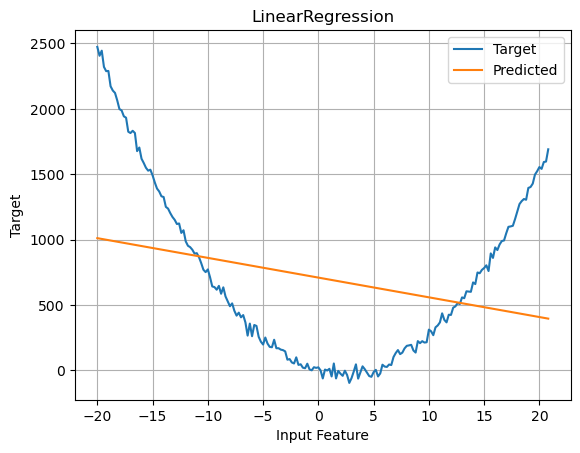

In [36]:
# Plot the entire dataset

plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, lin_regressor.predict(df[['x']]), label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

Linear Regression is showing clear symptoms of under fitting.

Input features are not sufficient to capture complext relationship

### Solution for LinearRegression underfitting

Add new x**2  term to dataframe


In [38]:
df_train['x2'] = df_train['x']**2

df_validation['x2'] = df_validation['x']**2

df['x2'] = df['x']**2

In [40]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [41]:
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
lin_regressor.coef_

array([-22.98286274,   4.98161803])

In [43]:
lin_regressor.intercept_

5.86810755251679

In [44]:
result = lin_regressor.predict(X_validation)

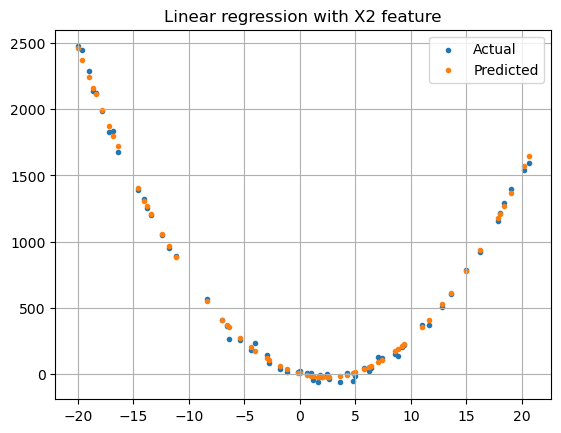

In [45]:
plt.title('Linear regression with X2 feature')
plt.scatter(df_validation.x, df_validation.y, label='Actual',marker='.')
plt.scatter(df_validation.x, result, label='Predicted', marker='.')
plt.grid()
plt.legend()
plt.show()

In [46]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y, result)

print(' mean squared error: {0:.2f}'.format(mse))
print(' root mean squared error: {0:.2f}'.format(mse**.5))

Linear Regression Metrics
 mean squared error: 927.22
 root mean squared error: 30.45


In [47]:
df.head()

,x,y,x2
0,-20.0,2473.236825,400.00
1,-19.8,2405.673895,392.04
2,-19.6,2444.523136,384.16
3,-19.4,2320.437236,376.36
4,-19.2,2288.088295,368.64


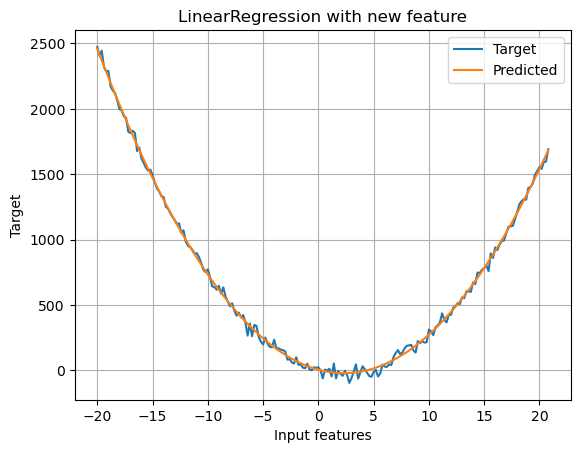

In [48]:
# plot for full dataset

plt.plot(df.x, df.y,label='Target')
plt.plot(df.x, lin_regressor.predict(df[['x','x2']]), label='Predicted')
plt.grid()
plt.xlabel('Input features')
plt.ylabel('Target')
plt.title('LinearRegression with new feature')
plt.legend()
plt.show()

### Check lower bound and upper bound for predicted values

In [49]:
# Quad function

def quad_func(x):
    return 5*x**2 - 23*x

In [52]:
# X is outside range of training samples
# New feature: Adding x^2 term

x = np.array([-100,-25,25,1000,5000])
y = quad_func(x)
df_tmp = pd.DataFrame({'x':x, 'x2':x**2,'y':y})

df_tmp['xgboost'] = regressor.predict(df_tmp[['x']])
df_tmp['linear'] = lin_regressor.predict(df_tmp[['x','x2']])

In [53]:
df_tmp.head()

,x,x2,y,xgboost,linear
0,-100,10000,52300,2405.004395,5.212033e+04
1,-25,625,3700,2405.004395,3.693951e+03
2,25,625,2550,1689.919678,2.544808e+03
3,1000,1000000,4977000,1689.919678,4.958641e+06
4,5000,25000000,124885000,1689.919678,1.244255e+08


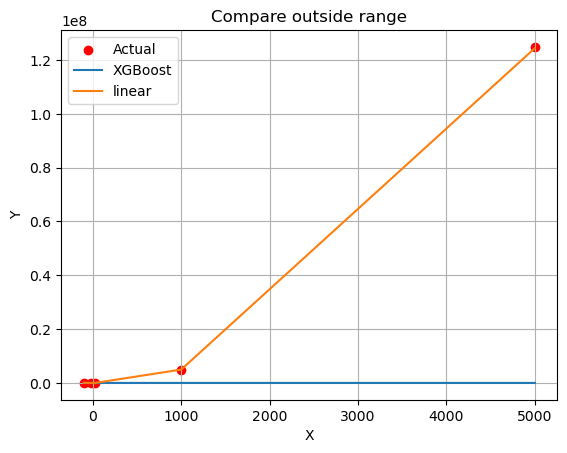

In [54]:
plt.scatter(df_tmp.x, df_tmp.y, label='Actual',color='r')
plt.plot(df_tmp.x, df_tmp.xgboost,label='XGBoost')
plt.plot(df_tmp.x, df_tmp.linear, label='linear')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Compare outside range')
plt.show()

In [55]:
# X is inside range of training samples
# New feature: Adding x^2 term

x = np.array([-15,-12,-5,0,1,3,5,7,9,11,15,18])
y = quad_func(x)
df_tmp = pd.DataFrame({'x':x, 'x2':x**2,'y':y})

df_tmp['xgboost'] = regressor.predict(df_tmp[['x']])
df_tmp['linear'] = lin_regressor.predict(df_tmp[['x','x2']])

In [56]:
df_tmp

,x,x2,y,xgboost,linear
0,-15,225,1470,1492.838623,1471.475106
1,-12,144,996,985.423035,999.015457
2,-5,25,240,201.286484,245.322872
3,0,0,0,22.254921,5.868108
4,1,1,-18,-0.432127,-12.133137
5,3,9,-24,-58.521095,-18.245918
6,5,25,10,-39.980625,15.494245
7,7,49,84,102.305519,89.087352
8,9,81,198,220.961136,202.533404
9,11,121,352,345.741241,355.832399


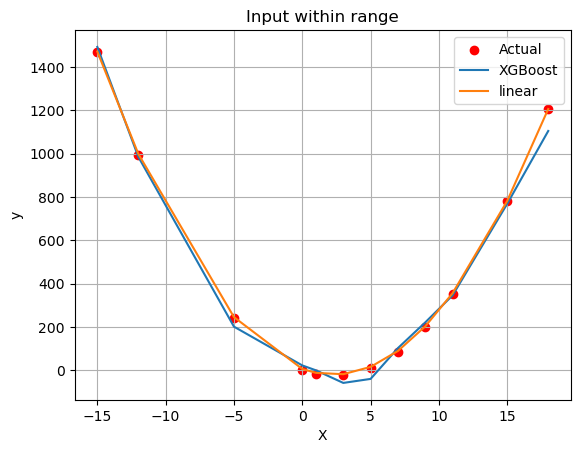

In [57]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates

plt.scatter(df_tmp.x, df_tmp.y, label='Actual',color='r')
plt.plot(df_tmp.x, df_tmp.xgboost,label='XGBoost')
plt.plot(df_tmp.x, df_tmp.linear, label='linear')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Input within range')
plt.show()

### Summary

1. In this excercise, we compared performance of XGBoost and Linear Regression on quadratic dataset

2. The relationship between input feature and target was non-linear

3. XGBoost handled it pretty well, whereas linear regression was underfitting

4. To correct linear regression issue, we added additional features for linear regression

5. With the new feature, linear regression performed much better

XGBoost can detect patterns involving non-linear relationship, whereas algorithms like linear regression may need complex feature engineering